<a href="https://colab.research.google.com/github/dushyantsinghraghav/Visualisation-Tensorflow/blob/main/time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this time series predictions i will do the following : 

1)loading the data 

2)format the data for time series problem i.e. creating training data and test
 data & also the validation dataset

3) turning time series data  into supervised learning 

4)setting up deep learning  modelling experiments
Dense (fully-connected) networks
Sequence models (LSTM and 1D CNN)
Ensembling (combining multiple models together)
Multivariate models
Replicating the N-BEATS algorithm using TensorFlow layer subclassing


In [1]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-02-13 12:46:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-02-13 12:46:08 (7.25 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
#improving data series with pandas 
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"])
df.head(10)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)
#the frequency at which a time series value if collected is called seasonility
#trend : 
print(df.columns)

Index(['Currency', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)'],
      dtype='object')


In [5]:
# cyclic : time series  shows rises  and falls over an unfixed  period , these tend  to be longer / more variable  than seasonal parameters
#only want closing price of each day 
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"}) 
bitcoin_prices.head(10)

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


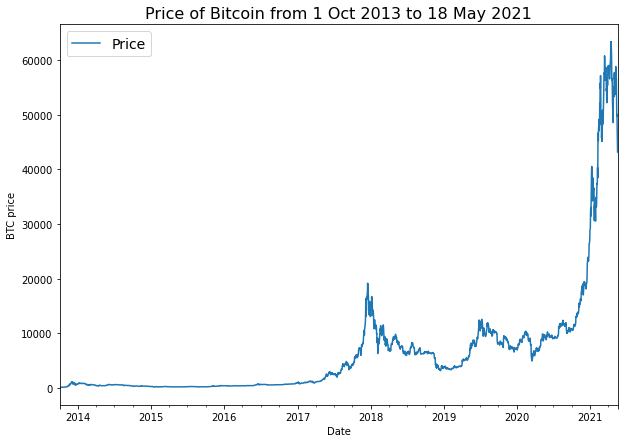

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [7]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

#view the first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

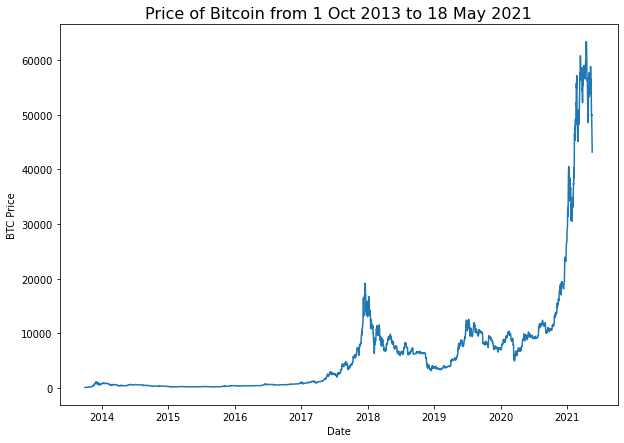

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price")

#preparaing the data 
creating training and test dataset for time series dataset
No scaling and no outlier removal 
only splitting the dataset into training and testing as well as into validation

In [9]:
#get the bitcoin date array
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
#Create train and test datasaet right way without using the train_test_split

split_size=int(0.8 * len(prices))
#create train data splits
X_train, y_train= timesteps[:split_size], prices[:split_size]
#create test dataset using the split
X_test, y_test = timesteps[:split_size] , prices[:split_size]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 2229, 2229, 2229)

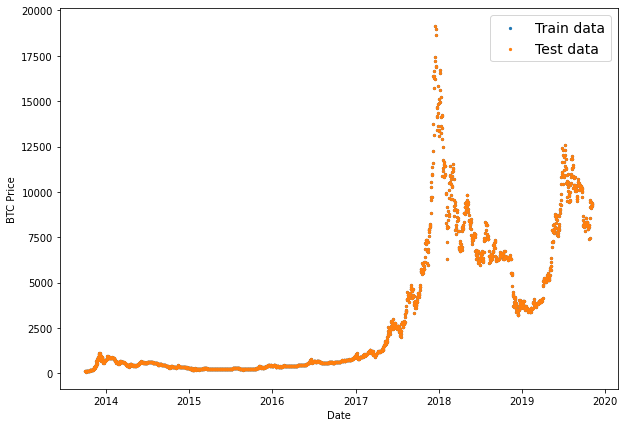

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


In [12]:
#Create a plotting function
def plot_time_series(timesteps, values
                     , format='.',start=0 , end=None,label=None):
  """
  Plot time steps(a series of points in time )  against the values(a series of values across timesteps)
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  #plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


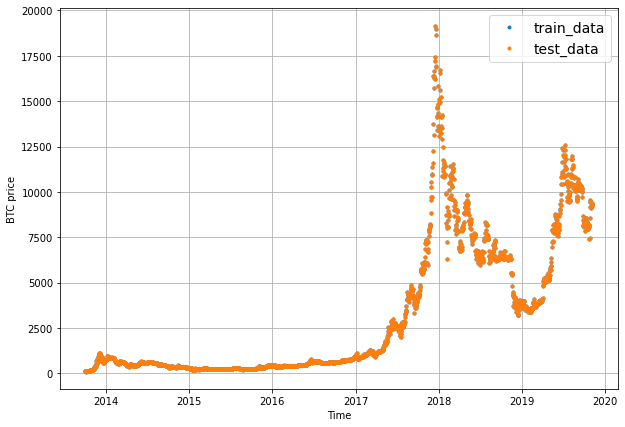

In [13]:
#Now we try our plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="train_data")
plot_time_series(timesteps=X_test,values=y_test,label="test_data")

# Modelling experiments
window and horizon are the terms basically used
horizon= no of timesteps to predict into the future
window=no of timesteps from past used to predict horizon


In [14]:
#lets make a model using tensorflow for time series forecating
import tensorflow as tf
#making use of mean absolute error
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE(assuming no seasonability of data)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  #find MAE of naive forecast
  mae_naive_no_season= tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return(mae/ mae_naive_no_season)

In [15]:
#Now we evaluate the predictions
def evaluate_preds(y_true,y_pred):
  #make sure(float 32) for metric calculations
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)
  #calculate various  metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)
  return{"mae": mae.numpy(),
         "mse": mse.numpy(),
         "rmse": rmse.numpy(),
         "mape": mape.numpy(),
         "mase":mase.numpy()}


In [16]:
naive_forecast= y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]),
 array([9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
        9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
        9369.62808116, 9326.59962378]))

In [17]:
naive_results=evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 105.12704,
 'mape': 2.812406,
 'mase': 0.99955887,
 'mse': 69026.62,
 'rmse': 262.72916}

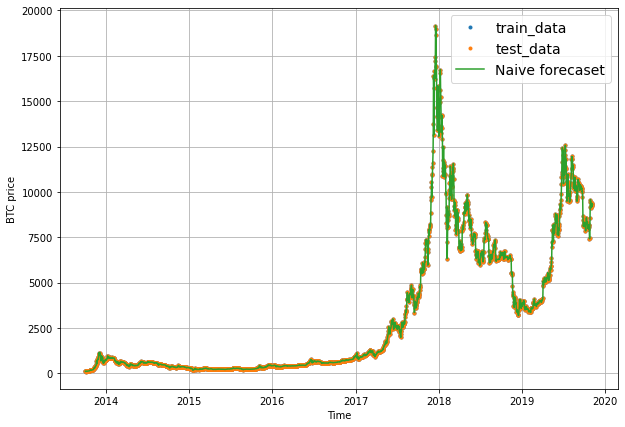

In [18]:
#we plot the naive forecaset
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="train_data")
plot_time_series(timesteps=X_test,values=y_test,label="test_data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive forecaset")

In [19]:
tf.reduce_mean(y_test).numpy()

3143.5967765646737

There are various types of timeseries prediction models:
1)arima(auto regression integrated moving average)
2)sktime(scikit learn time series)
3)tensorflow decision forest 

We window the dataset before making predictions 
it is very important.WIndowing is used to convert time series dataset into supervised learning  problem.
Univariate windowing and multivariate windowing 

In [20]:
WINDOW_SIZE=7
HORIZON=1
#Now we create a function to label window data
def get_labelled_windows(x,horizon=1):
  """create labels for windowed dataset
  """
  return(x[:,:-horizon],x[:,-horizon:])
  

In [21]:
#Now we test the window labelling function
test_window, test_label=get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [22]:
#create function to view numpy  arrays as functions
def make_windows(x,window_size=7,horizon=1):
  """
  Turns 1D array  into a 2D array  of sequential windows of window_size
  """
  #create a window of specific window_size
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  #create a 2D arrays of multiple window steps
  window_indexes=window_step+np.expand_dims(np.arange(len(x))-(window_size+horizon),axis=0).T
  windowed_array=x[window_indexes]

  #get the labelled windows
  windows,labels=get_labelled_windows(windowed_array,horizon=horizon)
  return (windows,labels)


In [23]:
#Now we use the above function
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_labels),len(full_windows)

(2787, 2787)

In [24]:
for i in range(3):
  print(full_windows[i])
  print(full_labels[i])

[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]
[43144.47129086]
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]
[123.65499]
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086   123.65499   ]
[125.455]


Now we turn the windows into training and testing dataset
